In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)

In [2]:
deliveries=pd.read_csv('deliveries.csv')

In [3]:
df=deliveries.copy()

In [4]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [6]:
df[['player_dismissed','dismissal_kind']].head(100)

,player_dismissed,dismissal_kind
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [7]:
df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [8]:
['retired hurt','obstructing the field','run out']

['retired hurt', 'obstructing the field', 'run out']

In [9]:
df.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [10]:
type(df.player_dismissed[0])

float

In [11]:
type(df.player_dismissed[11])

str

In [12]:
def is_bowlers_wicket(player_dismissed,dismissal_kind):
  if type(player_dismissed)==str:
    if dismissal_kind not in ['retired hurt','obstructing the field','run out']:
      return 1
    else:
      return 0
  else:
    return 0

In [13]:
df['isBowlerWk']=df.apply(lambda x: is_bowlers_wicket(x['player_dismissed'],x['dismissal_kind']),axis=1)

In [14]:
df.head(12)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,isBowlerWk
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,0
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN,0
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,0
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,0
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN,0


In [15]:
df[df.dismissal_kind=='run out'].head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,isBowlerWk
199,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,12,4,KM Jadhav,TM Head,MC Henriques,0,0,0,0,0,0,1,0,1,KM Jadhav,run out,BCJ Cutting,0
247,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,A Choudhary,YS Chahal,BCJ Cutting,0,0,0,0,0,0,0,0,0,YS Chahal,run out,CJ Jordan (sub),0
371,2,1,Mumbai Indians,Rising Pune Supergiant,20,6,HH Pandya,TG Southee,AB Dinda,0,1,0,0,0,0,0,1,1,TG Southee,run out,MS Dhoni,0
1063,5,1,Royal Challengers Bangalore,Delhi Daredevils,17,4,Vishnu Vinod,KM Jadhav,Z Khan,0,0,0,0,0,0,0,0,0,Vishnu Vinod,run out,S Nadeem,0
1313,6,1,Gujarat Lions,Sunrisers Hyderabad,18,4,DS Kulkarni,P Kumar,A Nehra,0,0,0,0,0,0,0,0,0,DS Kulkarni,run out,Rashid Khan,0
1985,9,1,Delhi Daredevils,Rising Pune Supergiant,16,2,RR Pant,SV Samson,BA Stokes,0,0,0,0,0,0,0,0,0,RR Pant,run out,MA Agarwal,0
2700,12,1,Royal Challengers Bangalore,Mumbai Indians,18,7,P Negi,KM Jadhav,JJ Bumrah,0,0,0,0,0,0,0,0,0,KM Jadhav,run out,JJ Bumrah,0
3942,17,1,Rising Pune Supergiant,Royal Challengers Bangalore,20,6,MK Tiwary,JD Unadkat,AF Milne,0,0,0,0,0,0,1,0,1,MK Tiwary,run out,V Kohli,0
4146,18,1,Delhi Daredevils,Kolkata Knight Riders,14,2,SS Iyer,KK Nair,SP Narine,0,0,0,0,0,0,1,0,1,SS Iyer,run out,C de Grandhomme,0
4794,20,2,Gujarat Lions,Royal Challengers Bangalore,18,4,RA Jadeja,Ishan Kishan,TM Head,0,0,0,0,0,0,1,0,1,RA Jadeja,run out,P Negi,0


In [16]:
##now we will analyse the problem that how dot% vary with number of dismissals in innings 1 and innings 2
def bowlerStats(df,current_innings):
  df=df[df.inning == current_innings]
  df.reset_index(inplace=True,drop=True)

  df['isDot']=df['total_runs'].apply(lambda x: 1 if x == 0 else 0)
  df['isOne']=df['total_runs'].apply(lambda x: 1 if x == 1 else 0)
  df['isTwo']=df['total_runs'].apply(lambda x: 1 if x == 2 else 0)
  df['isThree']=df['total_runs'].apply(lambda x: 1 if x == 3 else 0)
  df['isFour']=df['total_runs'].apply(lambda x: 1 if x == 4 else 0)
  df['isSix']=df['total_runs'].apply(lambda x: 1 if x == 6 else 0)

  runs=pd.DataFrame(df.groupby(['bowler'])['total_runs'].sum()).reset_index().rename(columns={'total_runs':'runs'})
  innings=pd.DataFrame(df.groupby(['bowler'])['match_id'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns={'match_id':'innings'})
  balls=pd.DataFrame(df.groupby(['bowler'])['match_id'].count()).reset_index().rename(columns={'match_id':'balls'})
  dismissals=pd.DataFrame(df.groupby(['bowler'])['isBowlerWk'].sum()).reset_index().rename(columns={'isBowlerWk':'dismissals'})

  dots=pd.DataFrame(df.groupby(['bowler'])['isDot'].sum()).reset_index().rename(columns={'isDot':'dots'})
  ones=pd.DataFrame(df.groupby(['bowler'])['isOne'].sum()).reset_index().rename(columns={'isOne':'ones'})
  twos=pd.DataFrame(df.groupby(['bowler'])['isTwo'].sum()).reset_index().rename(columns={'isTwo':'twos'})
  threes=pd.DataFrame(df.groupby(['bowler'])['isThree'].sum()).reset_index().rename(columns={'isThree':'threes'})
  fours=pd.DataFrame(df.groupby(['bowler'])['isFour'].sum()).reset_index().rename(columns={'isFour':'fours'})
  sixes=pd.DataFrame(df.groupby(['bowler'])['isSix'].sum()).reset_index().rename(columns={'isSix':'sixes'})

  df=pd.merge(innings,balls,on='bowler').merge(runs,on='bowler').merge(dismissals,on='bowler').merge(dots,on='bowler')
  df['dot%']=df.apply(lambda x: x['dots']/x['balls'], axis=1)

  return df

In [17]:
df1=bowlerStats(df, 1)

In [18]:
df2=bowlerStats(df, 2)

In [19]:
df1.head()

,bowler,innings,balls,runs,dismissals,dots,dot%
0,A Ashish Reddy,8,98,148,7,26,0.265306
1,A Chandila,6,120,142,3,51,0.425000
2,A Choudhary,2,52,72,3,18,0.346154
3,A Flintoff,2,48,95,1,10,0.208333
4,A Joseph,1,13,23,0,4,0.307692


In [20]:
df2.head()

,bowler,innings,balls,runs,dismissals,dots,dot%
0,A Ashish Reddy,12,172,252,11,53,0.308140
1,A Chandila,6,114,103,8,52,0.456140
2,A Choudhary,3,56,72,2,24,0.428571
3,A Dananjaya,1,25,48,0,6,0.240000
4,A Flintoff,1,18,11,1,10,0.555556


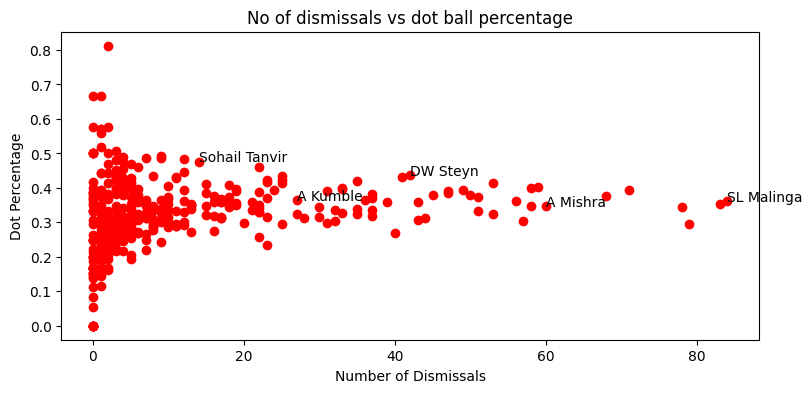

In [21]:
plt.figure(figsize=(9,4))
plt.scatter(df1['dismissals'],df1['dot%'],color='red')
plt.xlabel('Number of Dismissals')
plt.ylabel('Dot Percentage')
plt.title("No of dismissals vs dot ball percentage")
selected_bowlers=['A Kumble','SL Malinga','A Mishra','Sohail Tanvir','DW Steyn']
annotations=list(df1['bowler'])

for i,j in enumerate(annotations):
  if j in selected_bowlers:
    plt.annotate(j, (df1['dismissals'][i],df1['dot%'][i]))
plt.show()


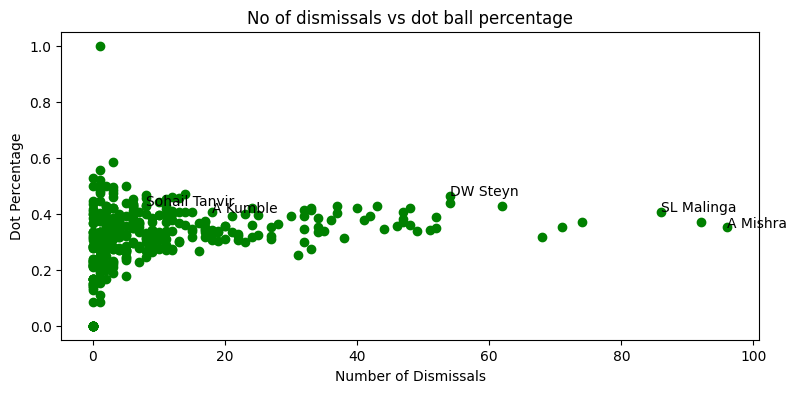

In [22]:
plt.figure(figsize=(9,4))
plt.scatter(df2['dismissals'],df2['dot%'],color='green')
plt.xlabel('Number of Dismissals')
plt.ylabel('Dot Percentage')
plt.title("No of dismissals vs dot ball percentage")
selected_bowlers=['A Kumble','SL Malinga','A Mishra','Sohail Tanvir','DW Steyn']
annotations=list(df2['bowler'])

for i,j in enumerate(annotations):
  if j in selected_bowlers:
    plt.annotate(j, (df2['dismissals'][i],df2['dot%'][i]))
plt.show()

In [23]:
df1['dot%'].mean(),df2['dot%'].mean()

(0.32517257826565726, 0.3211331248107267)

In [24]:
selected_player='SL Malinga'

In [25]:
def show_player(selected_player):

  total_wickets= df[df.bowler == 'A Kumble'].groupby(['bowler'])['isBowlerWk'].sum().item()
  plt.figure(figsize=(12,4))
  plt.title(selected_player + '- aganist all opposition')
  df[df.bowler == selected_player].groupby(['batting_team'])['isBowlerWk'].sum().sort_values(ascending=True).plot(kind='barh')
  plt.xlabel('Number of wickets')
  plt.ylabel('Opposition Team Names')
  plt.show()

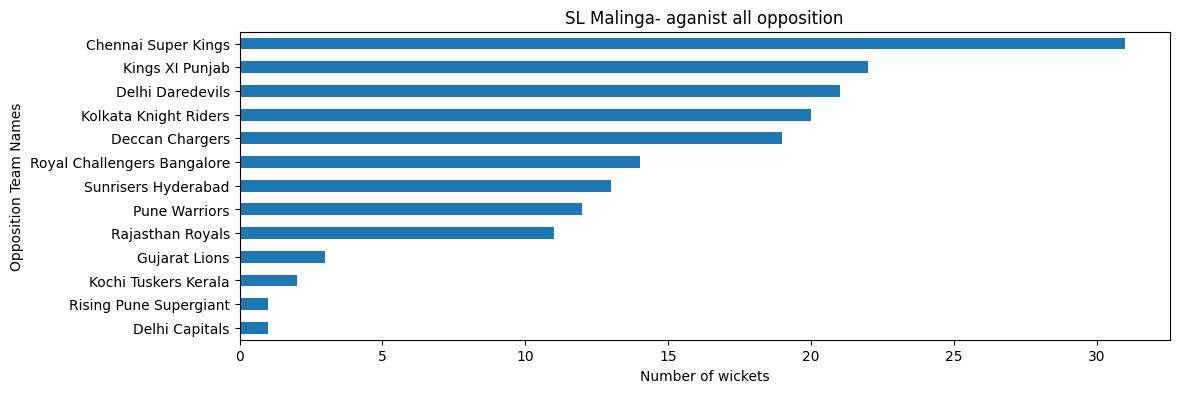

In [26]:
show_player('SL Malinga')

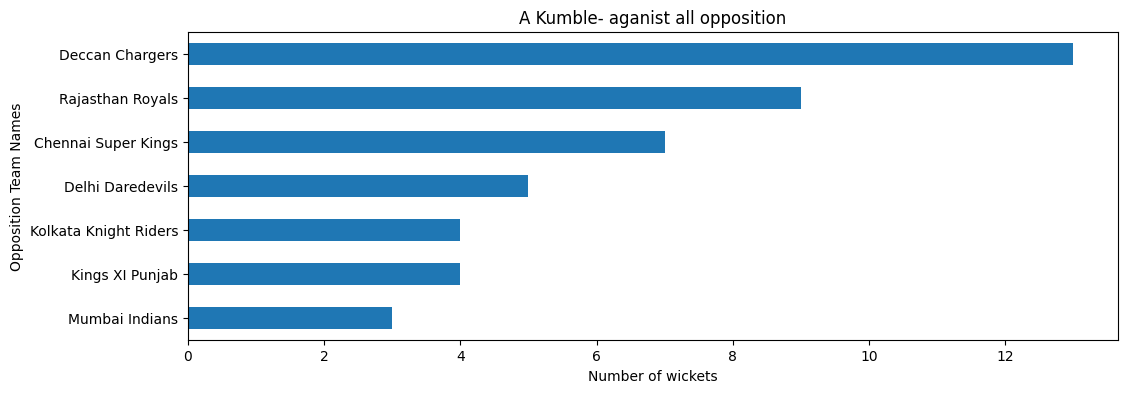

In [27]:
show_player('A Kumble')

In [28]:
df[df.bowler == 'A Kumble'].groupby(['bowler'])['isBowlerWk'].sum().item()

45

In [29]:
matches=pd.read_csv('matches.csv')

In [30]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [31]:
mdf=matches.copy()

In [32]:
mdf.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [33]:
# team1, team2, winner, toss winner, toss decision
def wintoss_winmatch(toss_winner, winner):
  if toss_winner == winner:
    return 1
  else:
    return 0

In [34]:
mdf['wintoss_winmatch']=mdf.apply(lambda x: wintoss_winmatch(x['toss_winner'],x['winner']), axis=1)

In [35]:
mdf.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,wintoss_winmatch
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,0
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,1
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,1
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,1
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,1


In [36]:
mdf[['winner','toss_winner','wintoss_winmatch']].head()

,winner,toss_winner,wintoss_winmatch
0,Sunrisers Hyderabad,Royal Challengers Bangalore,0
1,Rising Pune Supergiant,Rising Pune Supergiant,1
2,Kolkata Knight Riders,Kolkata Knight Riders,1
3,Kings XI Punjab,Kings XI Punjab,1
4,Royal Challengers Bangalore,Royal Challengers Bangalore,1


In [37]:
len(mdf)

756

In [38]:
100*len(mdf[mdf.wintoss_winmatch ==1])/ len(mdf)

51.98412698412698

In [39]:
pd.DataFrame(mdf.groupby(['season'])['wintoss_winmatch'].sum()/mdf.groupby(['season'])['wintoss_winmatch'].count())

,wintoss_winmatch
season,
2008,0.482759
2009,0.578947
2010,0.516667
2011,0.520548
2012,0.445946
2013,0.473684
2014,0.500000
2015,0.474576
2016,0.566667


In [40]:
mdf.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,wintoss_winmatch
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,0
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,1
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,1
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,1
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,1


In [41]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,isBowlerWk
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,0


In [42]:
mdf=mdf.rename(columns={'id':'match_id'})

In [43]:
mdf.head()

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,wintoss_winmatch
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,0
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,1
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,1
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,1
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,1


In [44]:
cdf=pd.merge(df,mdf,on='match_id',how='left')

In [45]:
cdf.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,isBowlerWk,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,wintoss_winmatch
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,0


In [46]:
cdf.groupby(['venue'])['total_runs'].sum()  ##number of runs scored on the stadium

venue
ACA-VDCA Stadium                                          658
Barabati Stadium                                         2278
Brabourne Stadium                                        3842
Buffalo Park                                              799
De Beers Diamond Oval                                     897
Dr DY Patil Sports Academy                               4810
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium      3121
Dubai International Cricket Stadium                      2064
Eden Gardens                                            23857
Feroz Shah Kotla                                        20896
Feroz Shah Kotla Ground                                  2260
Green Park                                               1298
Himachal Pradesh Cricket Association Stadium             2897
Holkar Cricket Stadium                                   2920
IS Bindra Stadium                                        2483
JSCA International Stadium Complex                       2056
Ki

In [47]:
cdf.groupby(['venue'])['match_id'].count()  ## number of matches held

venue
ACA-VDCA Stadium                                          491
Barabati Stadium                                         1695
Brabourne Stadium                                        2719
Buffalo Park                                              715
De Beers Diamond Oval                                     726
Dr DY Patil Sports Academy                               3993
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium      2546
Dubai International Cricket Stadium                      1700
Eden Gardens                                            17991
Feroz Shah Kotla                                        15604
Feroz Shah Kotla Ground                                  1701
Green Park                                                921
Himachal Pradesh Cricket Association Stadium             2159
Holkar Cricket Stadium                                   1965
IS Bindra Stadium                                        1690
JSCA International Stadium Complex                       1671
Ki

In [48]:
  ##number of unique matches held
  cdf.groupby(['venue'])['match_id'].apply(lambda x: len(list(np.unique(x))))

venue
ACA-VDCA Stadium                                         2
Barabati Stadium                                         7
Brabourne Stadium                                       11
Buffalo Park                                             3
De Beers Diamond Oval                                    3
Dr DY Patil Sports Academy                              17
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Dubai International Cricket Stadium                      7
Eden Gardens                                            77
Feroz Shah Kotla                                        67
Feroz Shah Kotla Ground                                  7
Green Park                                               4
Himachal Pradesh Cricket Association Stadium             9
Holkar Cricket Stadium                                   9
IS Bindra Stadium                                        7
JSCA International Stadium Complex                       7
Kingsmead                                         

In [49]:
vdf=pd.DataFrame(cdf.groupby(['venue'])['total_runs'].sum() / cdf.groupby(['venue'])['match_id'].apply(lambda x: len(list(np.unique(x)))))
##these are the runs scored per match on these respective stadiums
vdf.head()

,0
venue,
ACA-VDCA Stadium,329.000000
Barabati Stadium,325.428571
Brabourne Stadium,349.272727
Buffalo Park,266.333333
De Beers Diamond Oval,299.000000


In [50]:
vdf.columns=['avg_runs']

In [51]:
vdf.head()

,avg_runs
venue,
ACA-VDCA Stadium,329.000000
Barabati Stadium,325.428571
Brabourne Stadium,349.272727
Buffalo Park,266.333333
De Beers Diamond Oval,299.000000


In [52]:
vdf.sort_values('avg_runs',ascending=False).head()

,avg_runs
venue,
IS Bindra Stadium,354.714286
Brabourne Stadium,349.272727
M. Chinnaswamy Stadium,334.714286
"Punjab Cricket Association IS Bindra Stadium, Mohali",334.357143
Saurashtra Cricket Association Stadium,333.300000


In [54]:
def balls_per_dismissal(balls,dismissals):
  if dismissals>0:
    return balls/dismissals
  else:
    return balls/1
def runs_per_ball(runs_conceeded,balls):
  if balls > 0:
    return runs_conceeded/balls
  else:
    return 1000
def runs_per_dismissal(runs_conceeded,dismissals):
  if dismissals > 0:
    return runs_conceeded/dismissals
  elif(runs_conceeded==0):
    return 1000
  else:
    return runs_conceeded/1

In [56]:
def bowlerStats(df,current_phase,current_venue):
  df=df[df.phase == current_phase]
  df=df[df.venue == current_venue]
  df.reset_index(inplace=True,drop=True)

  df['isDot']=df['total_runs'].apply(lambda x: 1 if x == 0 else 0)
  df['isOne']=df['total_runs'].apply(lambda x: 1 if x == 1 else 0)
  df['isTwo']=df['total_runs'].apply(lambda x: 1 if x == 2 else 0)
  df['isThree']=df['total_runs'].apply(lambda x: 1 if x == 3 else 0)
  df['isFour']=df['total_runs'].apply(lambda x: 1 if x == 4 else 0)
  df['isSix']=df['total_runs'].apply(lambda x: 1 if x == 6 else 0)

  runs=pd.DataFrame(df.groupby(['bowler'])['total_runs'].sum()).reset_index().rename(columns={'total_runs':'runs'})
  innings=pd.DataFrame(df.groupby(['bowler'])['match_id'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns={'match_id':'innings'})
  balls=pd.DataFrame(df.groupby(['bowler'])['match_id'].count()).reset_index().rename(columns={'match_id':'balls'})
  dismissals=pd.DataFrame(df.groupby(['bowler'])['isBowlerWk'].sum()).reset_index().rename(columns={'isBowlerWk':'dismissals'})

  dots=pd.DataFrame(df.groupby(['bowler'])['isDot'].sum()).reset_index().rename(columns={'isDot':'dots'})
  ones=pd.DataFrame(df.groupby(['bowler'])['isOne'].sum()).reset_index().rename(columns={'isOne':'ones'})
  twos=pd.DataFrame(df.groupby(['bowler'])['isTwo'].sum()).reset_index().rename(columns={'isTwo':'twos'})
  threes=pd.DataFrame(df.groupby(['bowler'])['isThree'].sum()).reset_index().rename(columns={'isThree':'threes'})
  fours=pd.DataFrame(df.groupby(['bowler'])['isFour'].sum()).reset_index().rename(columns={'isFour':'fours'})
  sixes=pd.DataFrame(df.groupby(['bowler'])['isSix'].sum()).reset_index().rename(columns={'isSix':'sixes'})

  df=pd.merge(innings,balls,on='bowler').merge(runs,on='bowler').merge(dismissals,on='bowler').merge(dots,on='bowler')
  df['dot%']=df.apply(lambda x: x['dots']/x['balls'], axis=1)
  df['SR']=df.apply(lambda x: balls_per_dismissal(x['balls'],x['dismissals']),axis=1)
  df['Eco']=df.apply(lambda x: 6*runs_per_ball(x['runs'],x['balls']),axis=1)
  df['Avg']=df.apply(lambda x: runs_per_dismissal(x['runs'],x['dismissals']),axis=1)

  return df

In [57]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,isBowlerWk
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,0


In [61]:
cdf['over_no']=cdf['over'].apply(lambda x: x-1)

In [62]:
def get_phase(over_no):
  if over_no < 6:
    return 'Powerplay'
  elif over_no < 15:
    return 'Middle'
  else:
    return 'Death'

In [63]:
cdf['phase']=cdf['over_no'].apply(lambda x:get_phase(x))

In [65]:
cdf[(cdf['venue'] == 'M Chinnaswamy Stadium') & cdf['phase'] == 'Powerplay'].head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,isBowlerWk,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,wintoss_winmatch,over_no,phase


In [75]:
def ByCustom(df, get_phase,selected_venue):

    df = df[df.venue == selected_venue]
    df.reset_index(inplace = True, drop = True)

    df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

    runs = pd.DataFrame(df.groupby(['bowler', 'match_id'])['total_runs'].sum().reset_index()).groupby(['bowler'])['total_runs'].sum().reset_index().rename(columns={'total_runs':'runs'})
    innings = pd.DataFrame(df.groupby(['bowler'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
    balls = pd.DataFrame(df.groupby(['bowler'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
    dismissals = pd.DataFrame(df.groupby(['bowler'])['isBowlerWk'].sum()).reset_index().rename(columns = {'isBowlerWk':'dismissals'})

    dots = pd.DataFrame(df.groupby(['bowler'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['bowler'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['bowler'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['bowler'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['bowler'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['bowler'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

    df = pd.merge(innings, runs, on = 'bowler').merge(balls, on = 'bowler').merge(dismissals, on = 'bowler').merge(dots, on = 'bowler').merge(ones, on = 'bowler').merge(twos, on = 'bowler').merge(threes, on = 'bowler').merge(fours, on = 'bowler').merge(sixes, on = 'bowler')
    df['dot%']=df.apply(lambda x: x['dots']/x['balls'], axis=1)
    df['Avg'] = df.apply(lambda x: runs_per_dismissal(x['runs'], x['dismissals']), axis = 1)
    df['SR'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)
    df['Eco'] = df.apply(lambda x: runs_per_ball(x['balls'], x['runs'])*6, axis = 1)

    return df

In [81]:
df1=ByCustom(cdf,'Powerplay','M Chinnaswamy Stadium')
df2=ByCustom(cdf,'Middle','M Chinnaswamy Stadium')
df3=ByCustom(cdf,'Death','M Chinnaswamy Stadium')

In [82]:
df1.head()

,bowler,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,dot%,Avg,SR,Eco
0,A Ashish Reddy,4,86,48,2,18,14,3,1,6,6,0.375000,43.000000,24.000000,3.348837
1,A Chandila,1,21,24,0,10,11,2,0,0,1,0.416667,21.000000,24.000000,6.857143
2,A Choudhary,3,57,55,3,30,13,5,0,5,2,0.545455,19.000000,18.333333,5.789474
3,A Kumble,12,363,291,9,108,132,10,0,28,13,0.371134,40.333333,32.333333,4.809917
4,A Mishra,5,159,104,4,30,49,7,0,11,7,0.288462,39.750000,26.000000,3.924528


In [83]:
df2.head()

,bowler,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,dot%,Avg,SR,Eco
0,A Ashish Reddy,4,86,48,2,18,14,3,1,6,6,0.375000,43.000000,24.000000,3.348837
1,A Chandila,1,21,24,0,10,11,2,0,0,1,0.416667,21.000000,24.000000,6.857143
2,A Choudhary,3,57,55,3,30,13,5,0,5,2,0.545455,19.000000,18.333333,5.789474
3,A Kumble,12,363,291,9,108,132,10,0,28,13,0.371134,40.333333,32.333333,4.809917
4,A Mishra,5,159,104,4,30,49,7,0,11,7,0.288462,39.750000,26.000000,3.924528


In [84]:
df3.head()

,bowler,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,dot%,Avg,SR,Eco
0,A Ashish Reddy,4,86,48,2,18,14,3,1,6,6,0.375000,43.000000,24.000000,3.348837
1,A Chandila,1,21,24,0,10,11,2,0,0,1,0.416667,21.000000,24.000000,6.857143
2,A Choudhary,3,57,55,3,30,13,5,0,5,2,0.545455,19.000000,18.333333,5.789474
3,A Kumble,12,363,291,9,108,132,10,0,28,13,0.371134,40.333333,32.333333,4.809917
4,A Mishra,5,159,104,4,30,49,7,0,11,7,0.288462,39.750000,26.000000,3.924528


In [85]:
np.mean(df1['Eco']),np.mean(df2['Eco']),np.mean(df3['Eco'])

(4.460387172866904, 4.460387172866904, 4.460387172866904)

In [86]:
np.mean(df1['dot%']),np.mean(df2['dot%']),np.mean(df3['dot%'])

(0.37319623679830716, 0.37319623679830716, 0.37319623679830716)

In [87]:
np.mean(df1['Avg']),np.mean(df2['Avg']),np.mean(df3['Avg'])

(35.0837510139767, 35.0837510139767, 35.0837510139767)

In [88]:
np.mean(df1['SR']),np.mean(df2['SR']),np.mean(df3['SR'])

(23.615755098048915, 23.615755098048915, 23.615755098048915)